In [1]:
# KNN: K Nearest Neighbors: Iris dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from collections import Counter

In [3]:
iris = datasets.load_iris()

In [4]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [5]:
df['target'] = iris.target

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = df.drop('target', axis = 1)

In [8]:
y = df['target']

In [9]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [11]:
# First data point with 4 dimensions
d1 = X.iloc[0]
print(d1)
print('length of d1 = ', len(d1))

# Similarly d2 is the second data point 
d2 = X.iloc[1]
print('length of d2 = ', len(d2))

# We have to determine distance between the two data points

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64
length of d1 =  4
length of d2 =  4


In [12]:
# Function to determine distance between 2 points:
# Minkowski distance: d(x,y) = [|x-y|^p]^1/p 
# p = 1: Manhattan distance

def man_dist(d1, d2):  # d1 and d2 are two data points and p is the power parameter
    
    dim = len(d1)         # dim = 4 in case of Iris dataset
    
    dist = 0              # Initialize the dist to zero
    
    for i in range(dim):
        
        dist = dist + abs(d1[i] - d2[i])
        
    return dist

In [13]:
man_dist(d1, d2)

0.6999999999999993

In [14]:
# Determine distane between the first record and all other records

distances = []            # Empty array to store the distance between the first data point and all other data points

for i in X.index:
    
    distances.append(man_dist(d1, X.iloc[i]))

In [15]:
# Append the distances array to a data frame

df_dist = pd.DataFrame(data = distances, index = X.index, columns = ['distances'])

In [16]:
df_dist.head()

,distances
0,0.0
1,0.7
2,0.8
3,1.0
4,0.2


In [17]:
# Determine the top 5 closet data point to the first data point, i.e. k = 5
# Using the sort function

df_5nn = df_dist.sort_values(by = ['distances'], axis = 0)[0:5]
# axis - 0 : sort amongst all the values in the column distances

print(df_5nn)

    distances
0         0.0
17        0.1
4         0.2
39        0.2
28        0.2


In [18]:
df_5nn['Labels']  = y.iloc[[0, 17, 4, 39, 28]]
df_5nn.head()

,distances,Labels
0,0.0,0
17,0.1,0
4,0.2,0
39,0.2,0
28,0.2,0


In [19]:
import statistics as st
a = X['sepal length (cm)']
print(st.mean(a))

b = X['sepal width (cm)']
print(st.mean(b))

c = X['petal length (cm)']
print(st.mean(c))

d = X['petal width (cm)']
print(st.mean(d))

5.843333333333334
3.0573333333333332
3.758
1.1993333333333334


In [20]:
# Consider a random test point: Mean value of all the features

test_pt = [5.84, 3.05, 3.75, 1.2]

# Determine the distance of all the data points from the test point

distances_test = []

for i in X.index:
    
    distances_test.append(man_dist(test_pt, X.iloc[i]))

In [21]:
df_test_nn = pd.DataFrame(data = distances_test, index = X.index, columns = ['distance'])
df_test_nn.head()

,distance
0,4.54
1,4.34
2,4.74
3,4.54
4,4.74


In [22]:
df_test_nn = df_test_nn.sort_values(by = ['distance'], axis = 0)
df_test_nn.head()

,distance
82,0.54
95,0.64
64,0.64
88,0.74
92,0.74


In [23]:
# Now we will determine the target class of the test data point based on the closet points
# We will use the majority class label 


# We can observe that we have the indices of the data points with minimum distance from the test point in df_test_5nn data frame
# We will use those indices and then determine the label of the test data point 
# The label of the test data point will be the label of the closet point i.e k = 1


from collections import Counter

count = Counter(y[df_test_nn.index])

label_test = count.most_common()

print(label_test)
# We observe that there are 50 data points each with labels 0, 1, 2 resp 

[(1, 50), (2, 50), (0, 50)]


In [24]:
# We choose the first value returned by the most_common method as the initial data points have min distance from the test data point

label_test = count.most_common()[0][0]
print(label_test)
# Thus the test point belongs to the target class '1'

1


In [25]:
# We repeat the above steps for all the test set and determine the target class the test data points belong to 

In [26]:
# test-train split ---- Standard Scaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [27]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [28]:
# We will use Manhattan distance in this problem 

def kNN(X_train, X_test, y_train, y_test, k):
    # We will predict a target class for each test data point
    
    y_pred = []                     # Empty array for storing the predicted value of each test data point
    
    for test_record in X_test:
        
        distances = []               # Store the distance of each test point from all the training points
        
        for train_record in X_train:
            
            dist = man_dist(test_record, train_record)     # Manhattan distane of a test point from all training points
        
            distances.append(dist)
            
        # Store the distance of each test point from all the training points in a data frame
        
        df_test = pd.DataFrame(data = distances, index = y_train.index, columns = ['distance'])
        
        # Sort distances in ascending order
        
        df_nn = df_test.sort_values(by = ['distance'], axis = 0)[0:k]      # Considering the k-nearest neighbors
        
        # Count the most common values of the nearest neighbors to predict the target class
        count = Counter(y_train[df_nn.index])
        
        # Get the first most common target class
        target_label = count.most_common()[0][0] 
        
        # Now we have the predicted target class of the test data point
        y_pred.append(target_label)
        
    return y_pred

# In the above function we compute the y_pred for each test data point and then move for the next test point
    

In [29]:
# Test the kNN function for k = 5

y_predicted = kNN(X_train, X_test, y_train, y_test, k = 5)

In [30]:
len(y_predicted)

30

In [31]:
# Calculate the accuracy by comparing the predicted target labels to the actual target labels

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_predicted))

0.9666666666666667


In [32]:
# Verifying the results using the sklearn KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5, p = 1)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

print(f"Sklearn KNN Accuracy: {accuracy_score(y_test, y_pred_test)}")

Sklearn KNN Accuracy: 0.9666666666666667


In [33]:
# We can observe that we could correctly classify all the test points using our kNN function and verified the same 
# using the sklearn library 

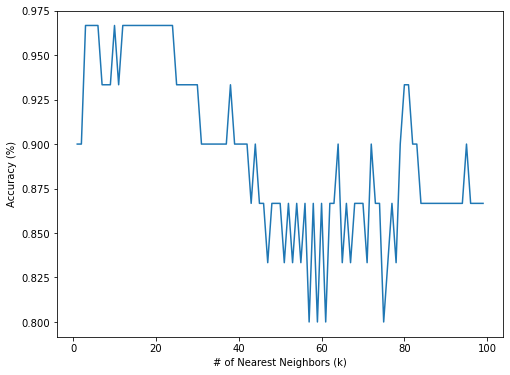

In [34]:
import matplotlib.pyplot as plt
accuracies = []

for k in range(1,100):
    y_hat_test = kNN(X_train, X_test, y_train, y_test, k)
    accuracies.append(accuracy_score(y_test, y_hat_test))

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');